In [ ]:
pip install sklearn

In [4]:
from sklearn.datasets import load_digits
digits = load_digits()

In [5]:
type(digits.data)

numpy.ndarray

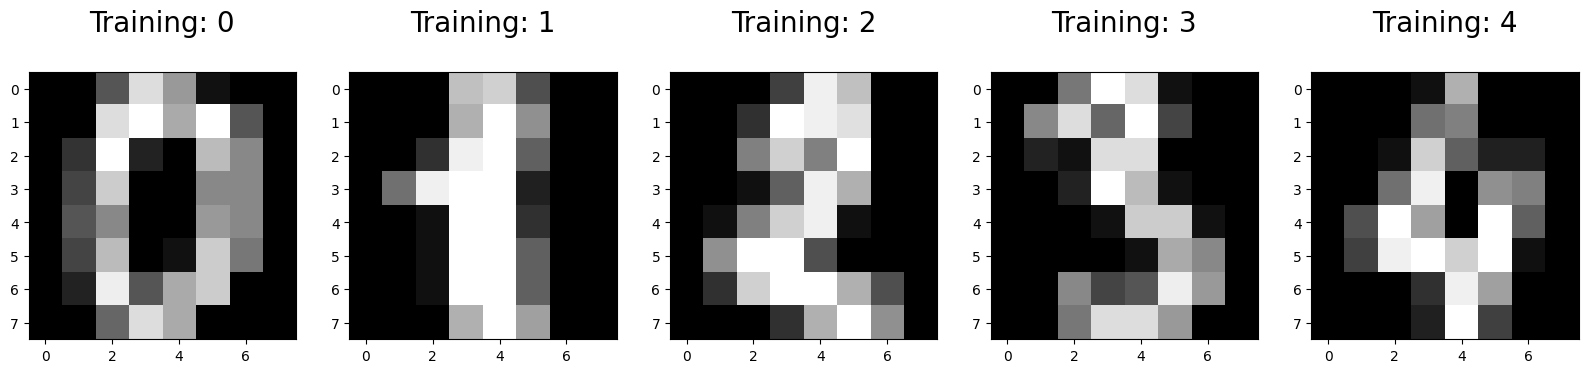

In [6]:
import numpy as np
import matplotlib.pyplot as plt

plt.figure(figsize=(20,4))
for index, (image, label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (8,8)), cmap=plt.cm.gray)
    plt.title('Training: %i\n' % label, fontsize = 20);


In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(digits.data, 
                                                    digits.target,
                                                   test_size=0.25,
                                                   random_state=0)

In [7]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(fit_intercept=True,
                        multi_class='auto',
                        penalty='l2', #ridge regression
                        solver='saga',
                        max_iter=10000,
                        C=50)

In [11]:
clf.fit(X_train, y_train)

LogisticRegression(C=50, max_iter=10000, solver='saga')

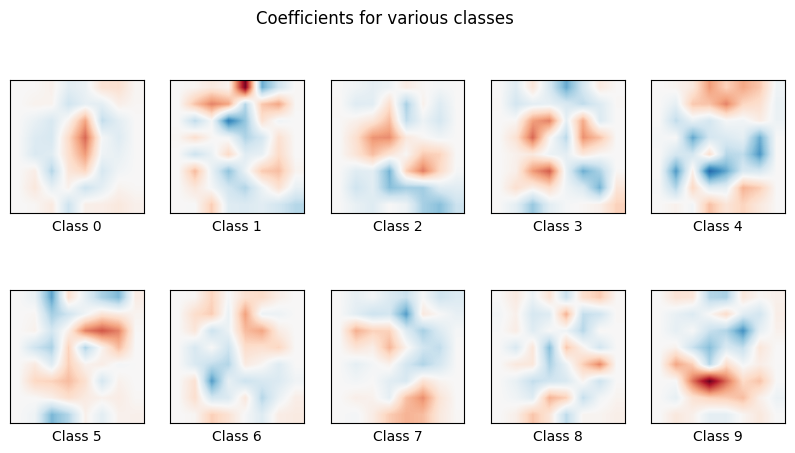

In [12]:
coef = clf.coef_.copy()
scale = np.abs(coef).max()
plt.figure(figsize=(10,5))
for i in range(10): 
    coef_plot = plt.subplot(2, 5, i + 1) 

    coef_plot.imshow(coef[i].reshape(8,8), 
                     cmap=plt.cm.RdBu,
                     vmin=-scale, vmax=scale,
                    interpolation='bilinear')
    
    coef_plot.set_xticks(()); coef_plot.set_yticks(()) 
    coef_plot.set_xlabel(f'Class {i}')

plt.suptitle('Coefficients for various classes');

In [13]:
print(clf.predict(X_test[0:9]))
print(y_test[0:9])

[2 8 2 6 6 7 1 9 8]
[2 8 2 6 6 7 1 9 8]


In [14]:
clf.score(X_train, y_train)

1.0

In [15]:
score = clf.score(X_test, y_test)